In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.fft import rfft, rfftfreq, irfft

In [2]:
%matplotlib inline

In [3]:
def build_feature(df, resample='1D'):
    df['return'] = df.close.pct_change()
    df['MA5'] = df['return'].rolling(5).mean()
    df['MA10'] = df['return'].rolling(10).mean()
    df['MA20'] = df['return'].rolling(20).mean()
    df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
    df = df.set_index('timestamp')
    df = df.resample(resample).last()
    df = df.dropna()
    return df

In [4]:
def build_dfs(resample='10D', cryptos=None):
    
    names = ['timestamp', 'open', 'high', 'low', 'close','volume', 'trade']
    dfs = []
    t_min = pd.to_datetime('2013-01-01')
    for crypto in cryptos:
        df = pd.read_csv(f'./data/{crypto}USD_1440.csv', names=names)
        df = build_feature(df, resample)
        t_min = max(t_min, df.index[0])
        dfs.append(df)

    dfs = [df[df.index > t_min] for df in dfs]
    return dfs

In [5]:
def plot(dfs, resample, x='return'):
    
    d = {'return':1, 'MA5':5, 'MA10':10, 'MA20':20, }
    sample_rate = int(resample[:-1])*d[x]
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(28, 10))
    
    for i, df in enumerate(dfs):
        ax[0].plot(df.index, df[x], label=f'{cryptos[i]}_{resample}_{x}')
        ax[0].set_title(f'Time domain')
        ax[0].legend()

        yf = rfft(df[x].values)
        xf = rfftfreq(len(df), 1 / sample_rate)
        amp = np.abs(yf)

        ax[1].plot(xf, amp, label=f'{cryptos[i]}_{resample}_{x}')
        ax[1].set_title(f'Freq domain')
        ax[1].legend()
    plt.tight_layout()
    fig.savefig(f'{resample}_{x}_{i}.jpg', dpi=300)

In [18]:
cryptos = ['XBT', 'ETH']
# cryptos = ['XBT', 'ETH', 'XMR', 'ZEC'] #, 'XLM'

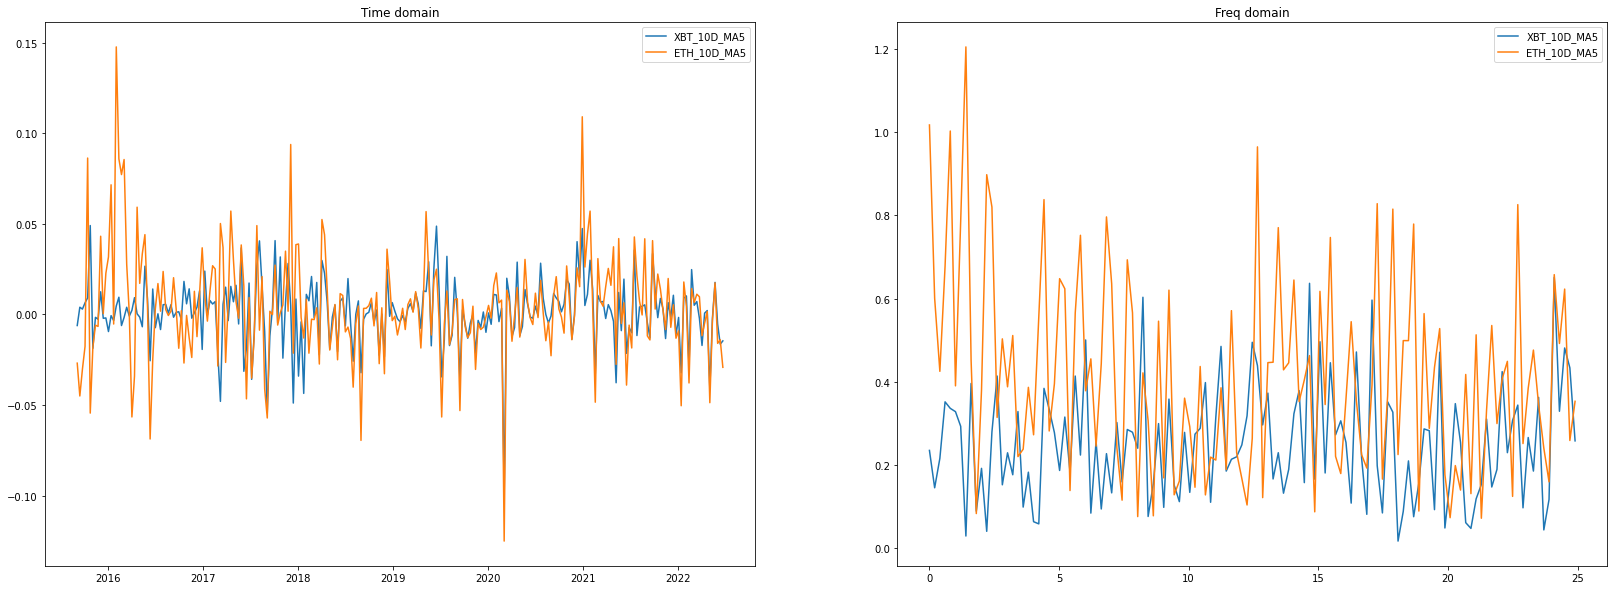

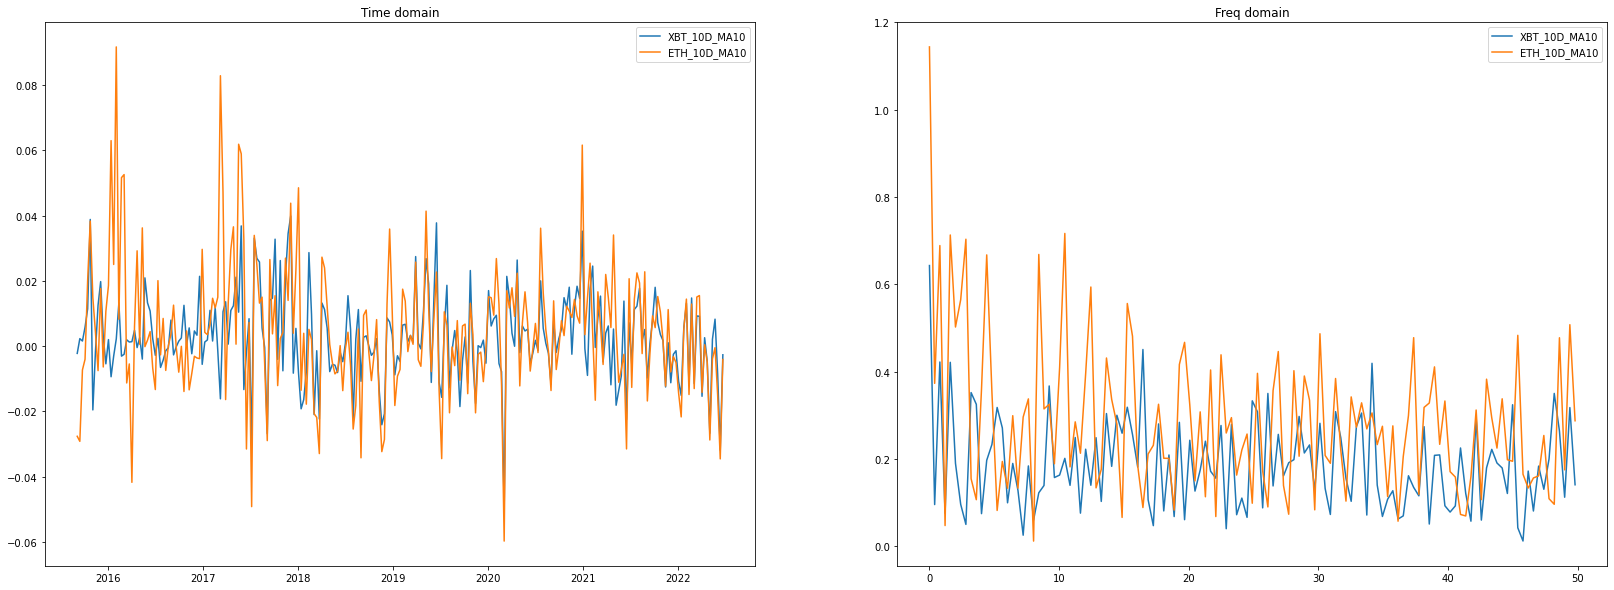

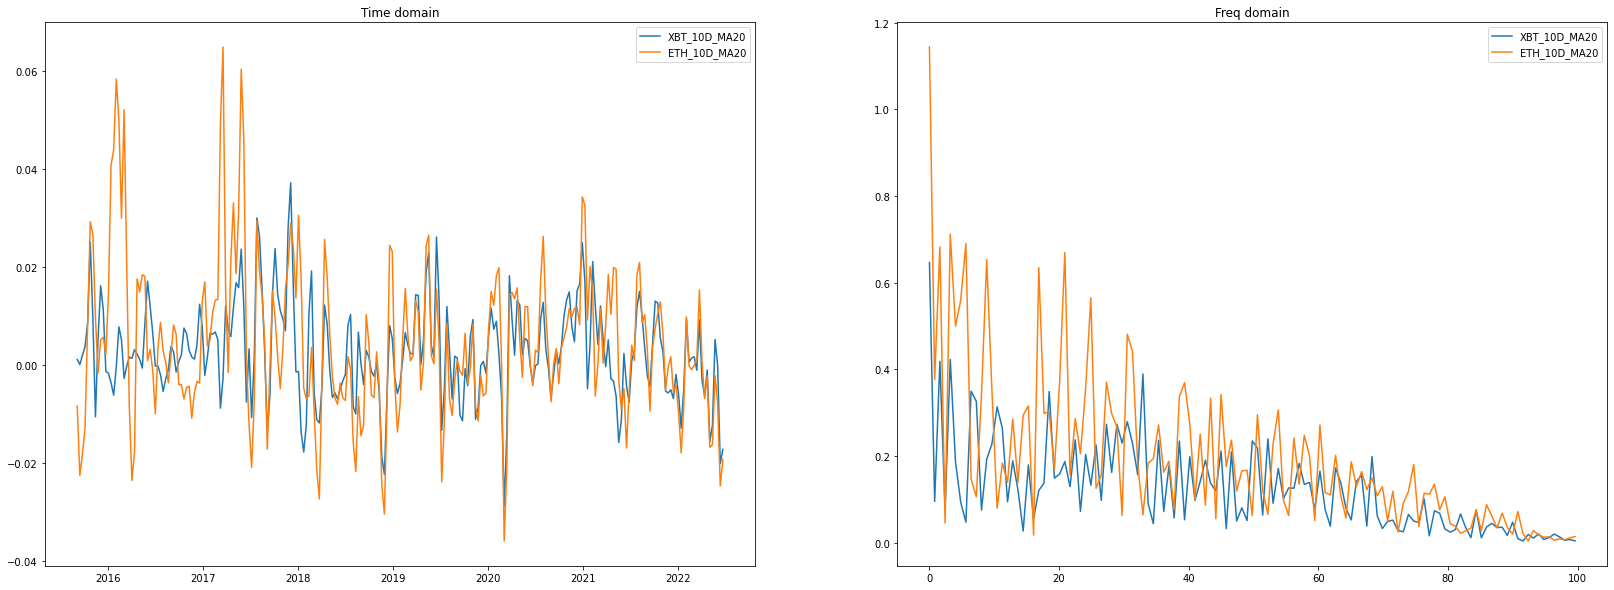

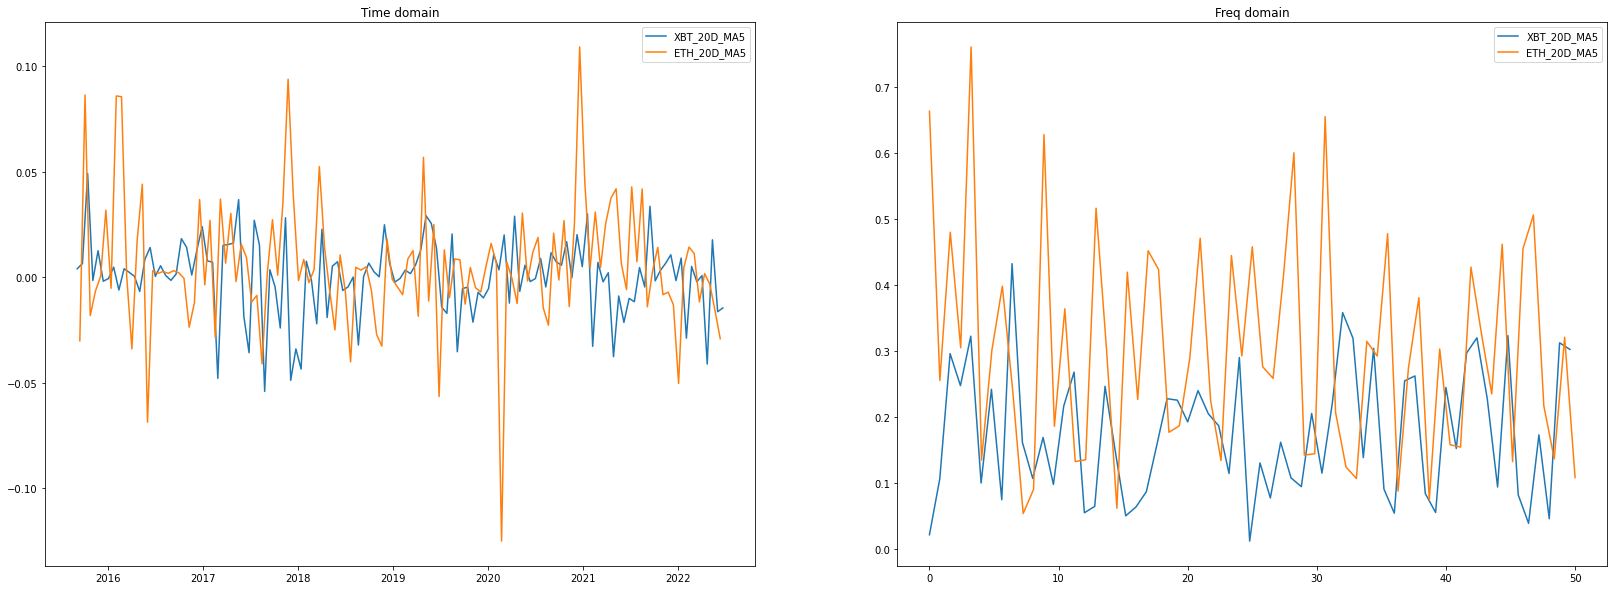

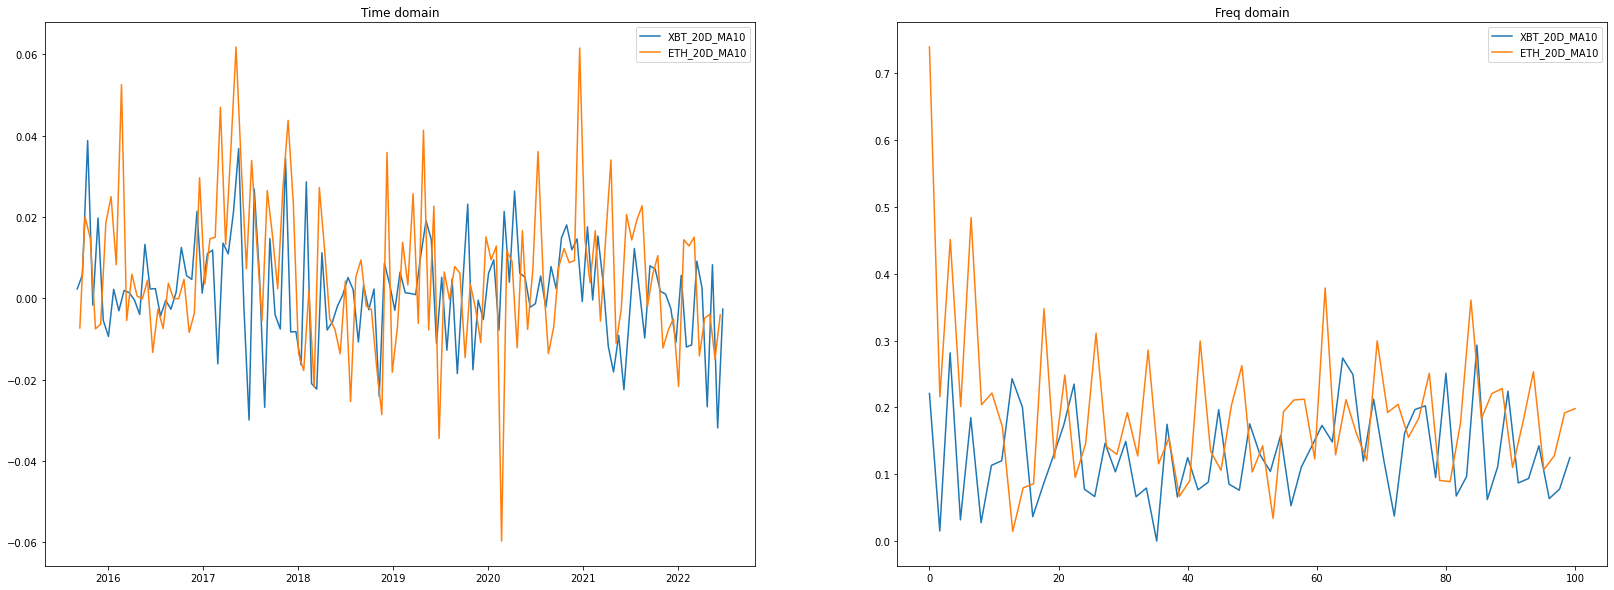

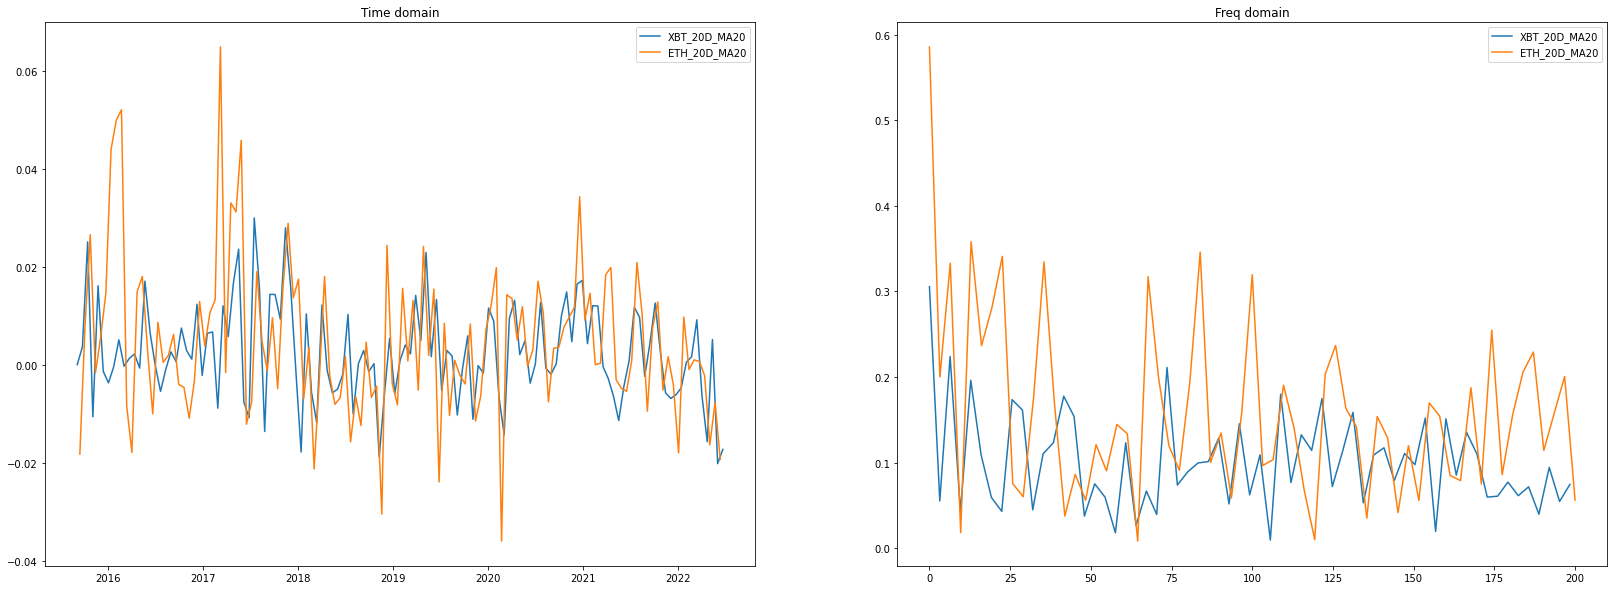

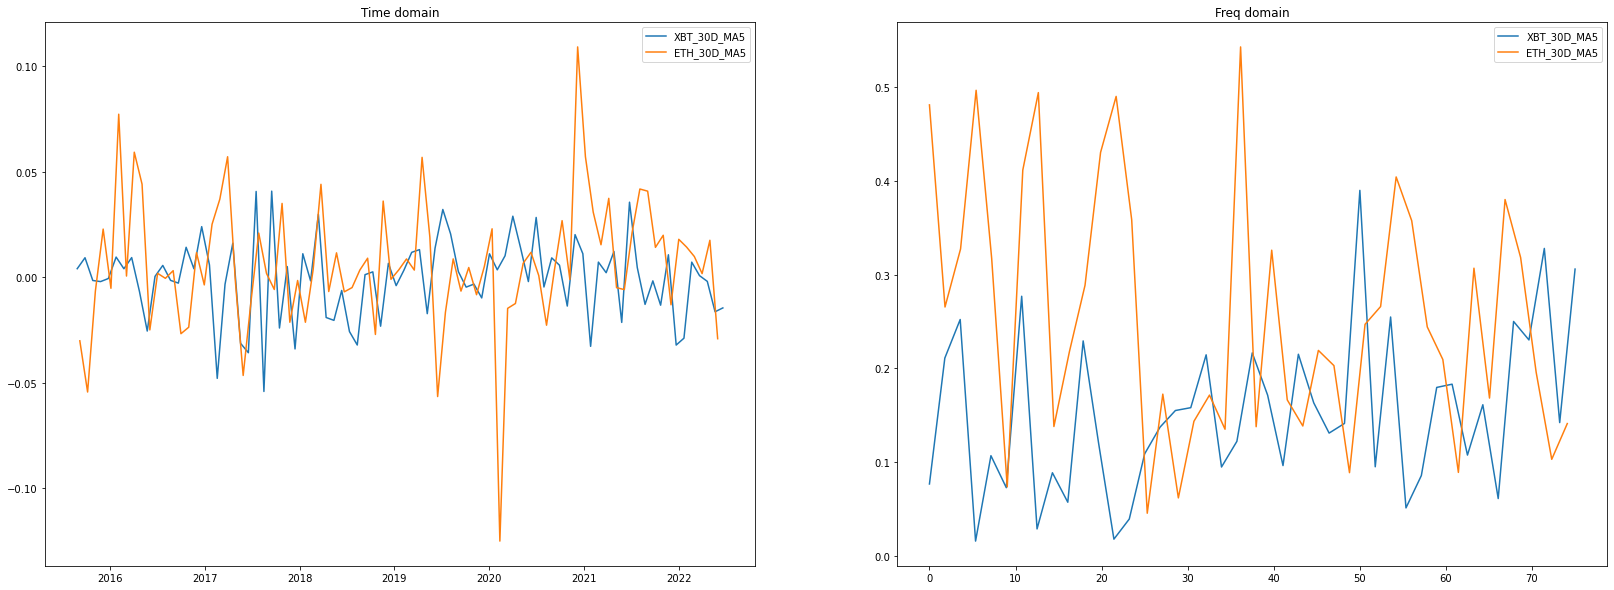

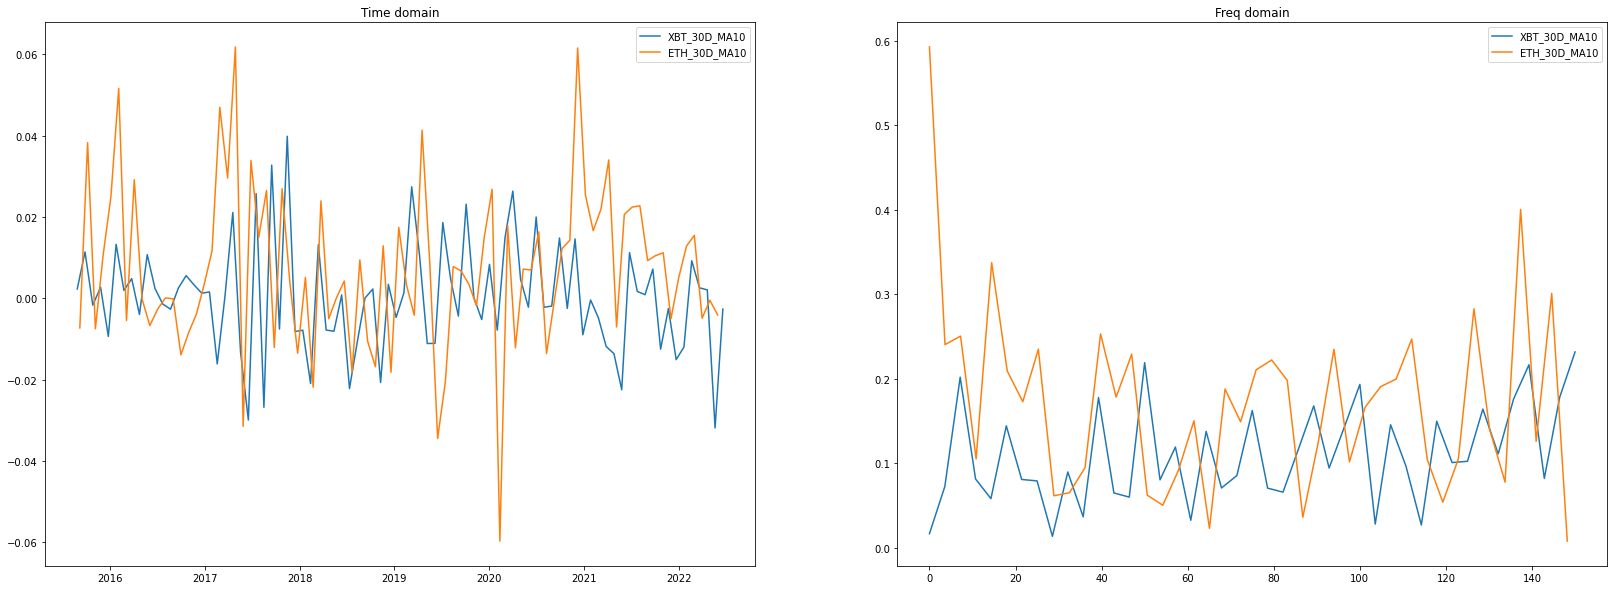

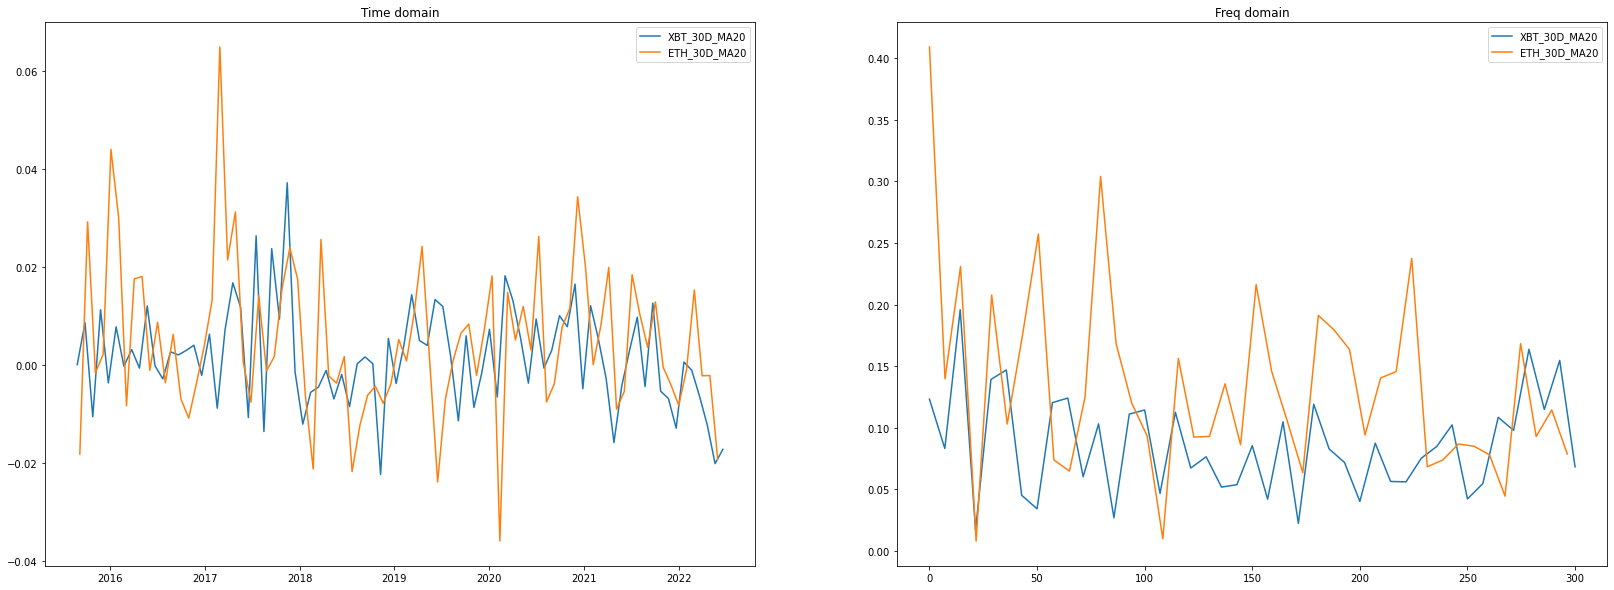

In [19]:
for resample in ['10D', '20D', '30D']:
    for x in ['MA5', 'MA10', 'MA20']:
        dfs = build_dfs(resample, cryptos)
        plot(dfs, resample, x)

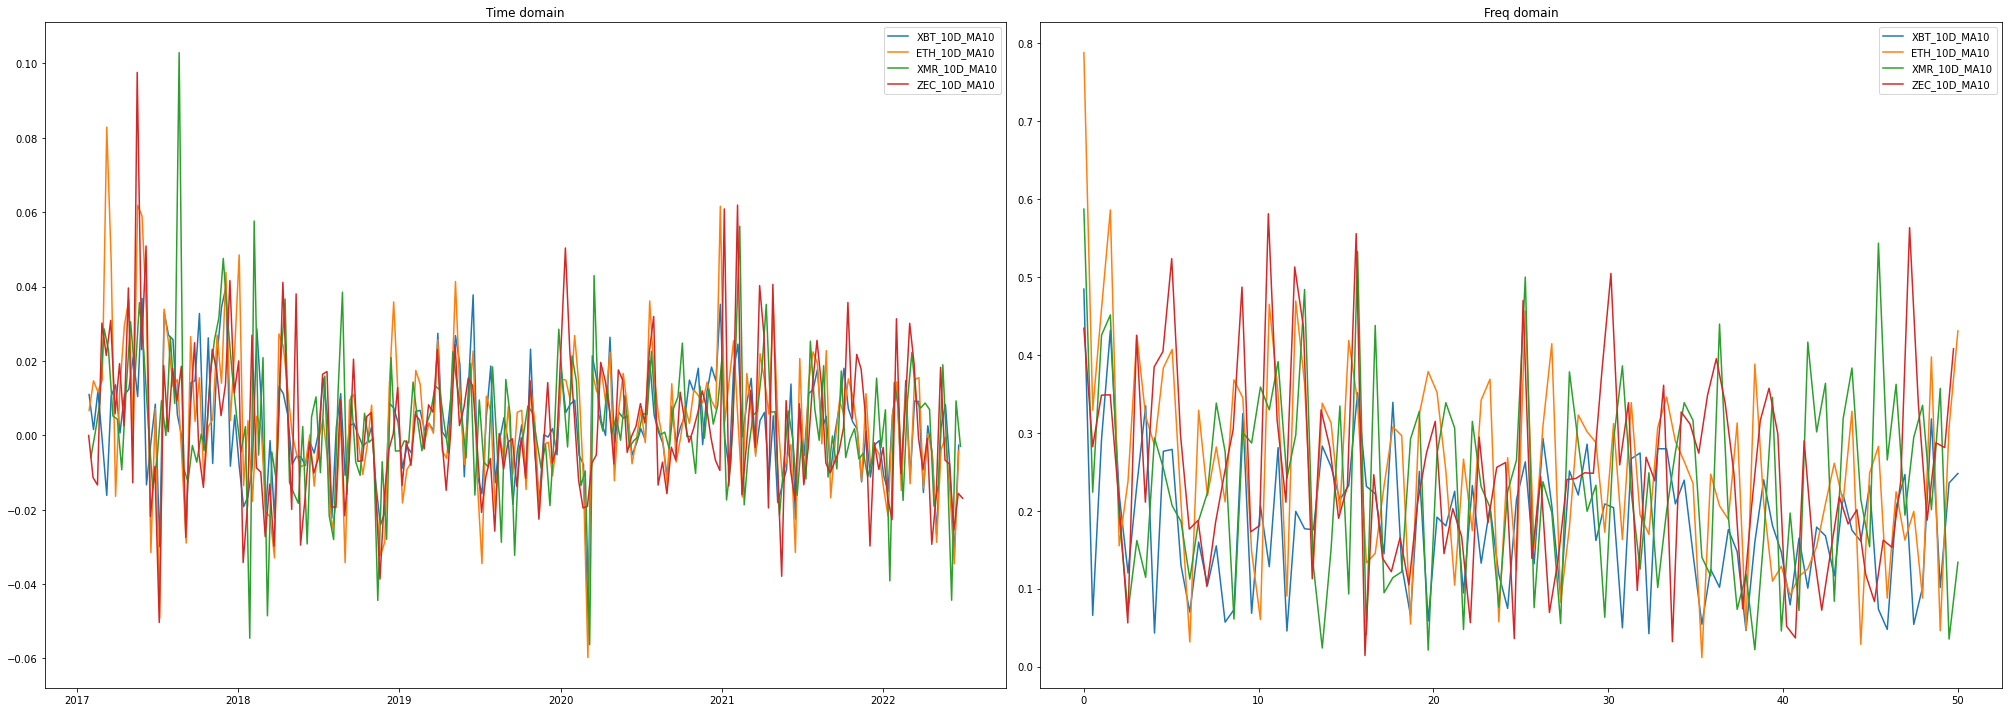

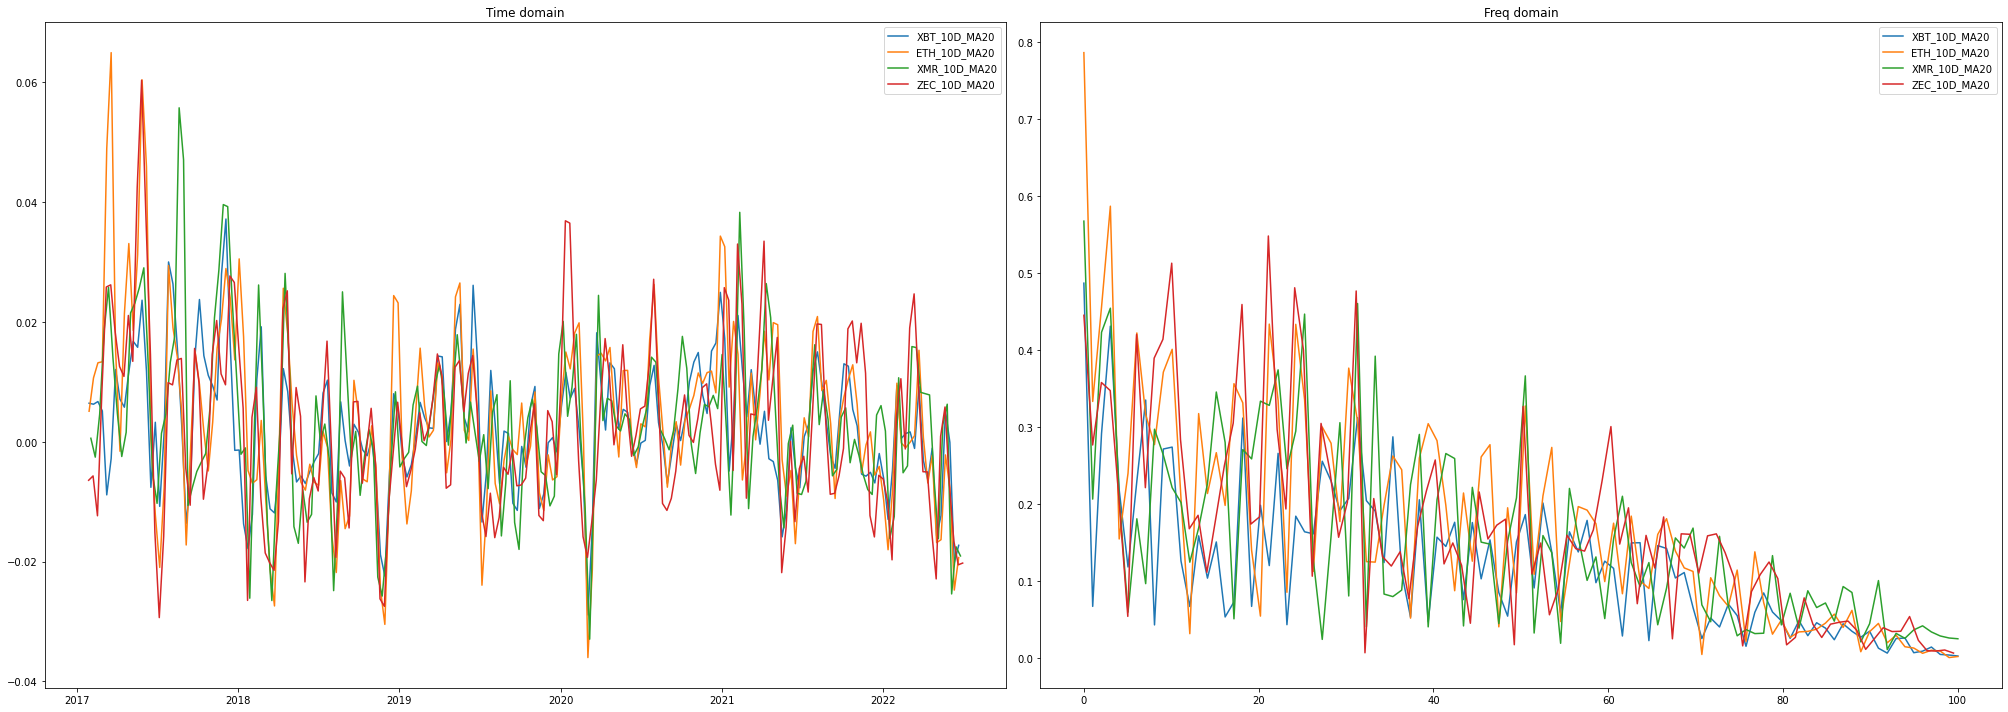

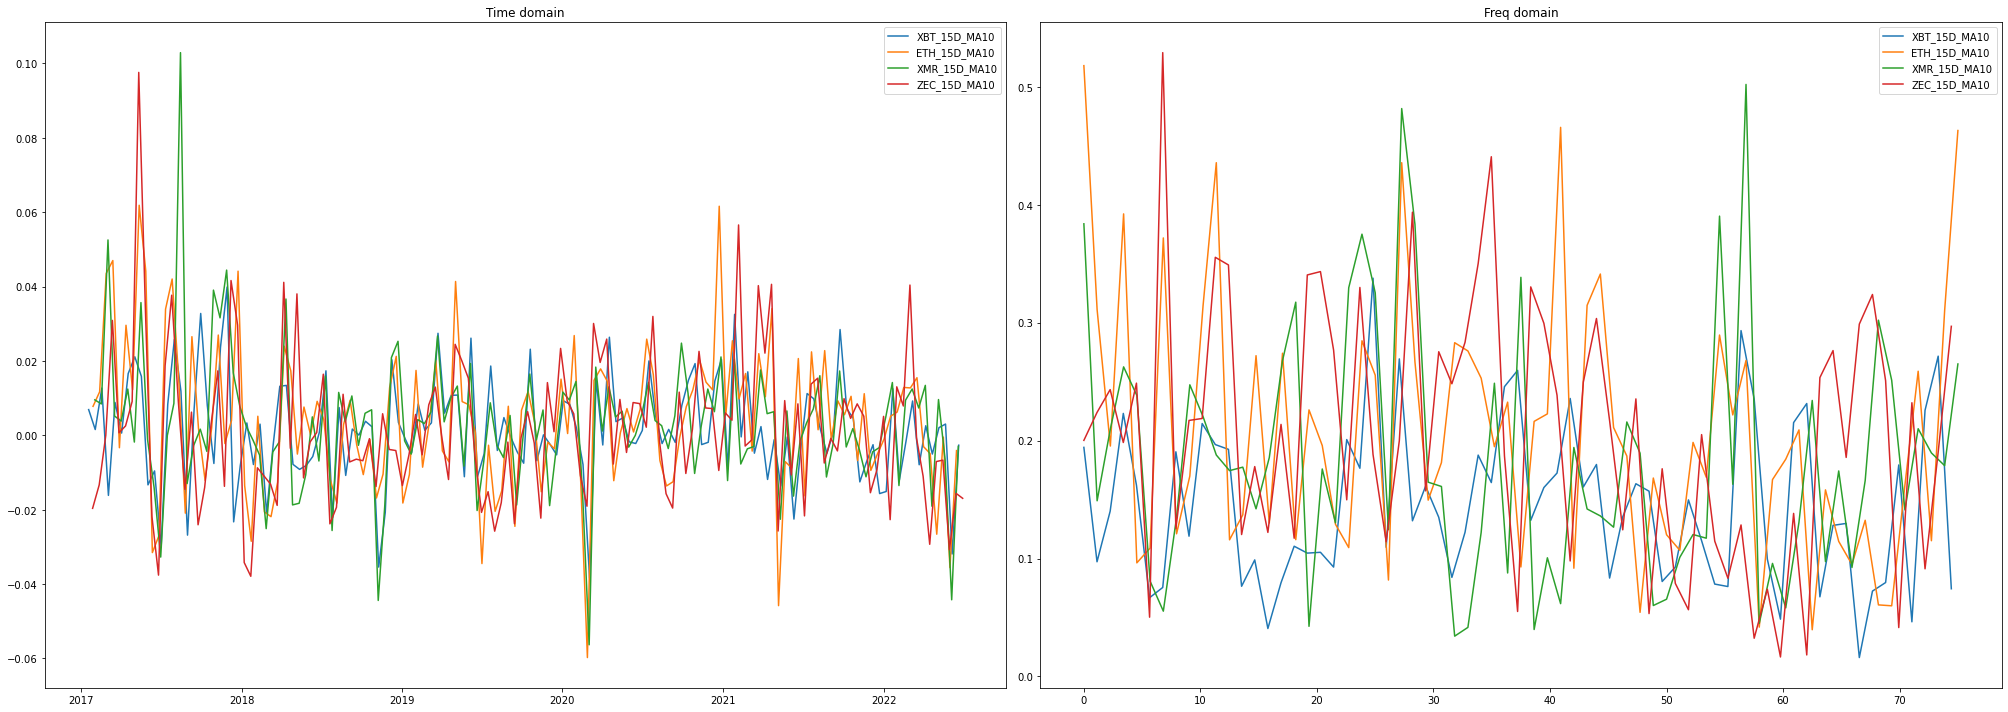

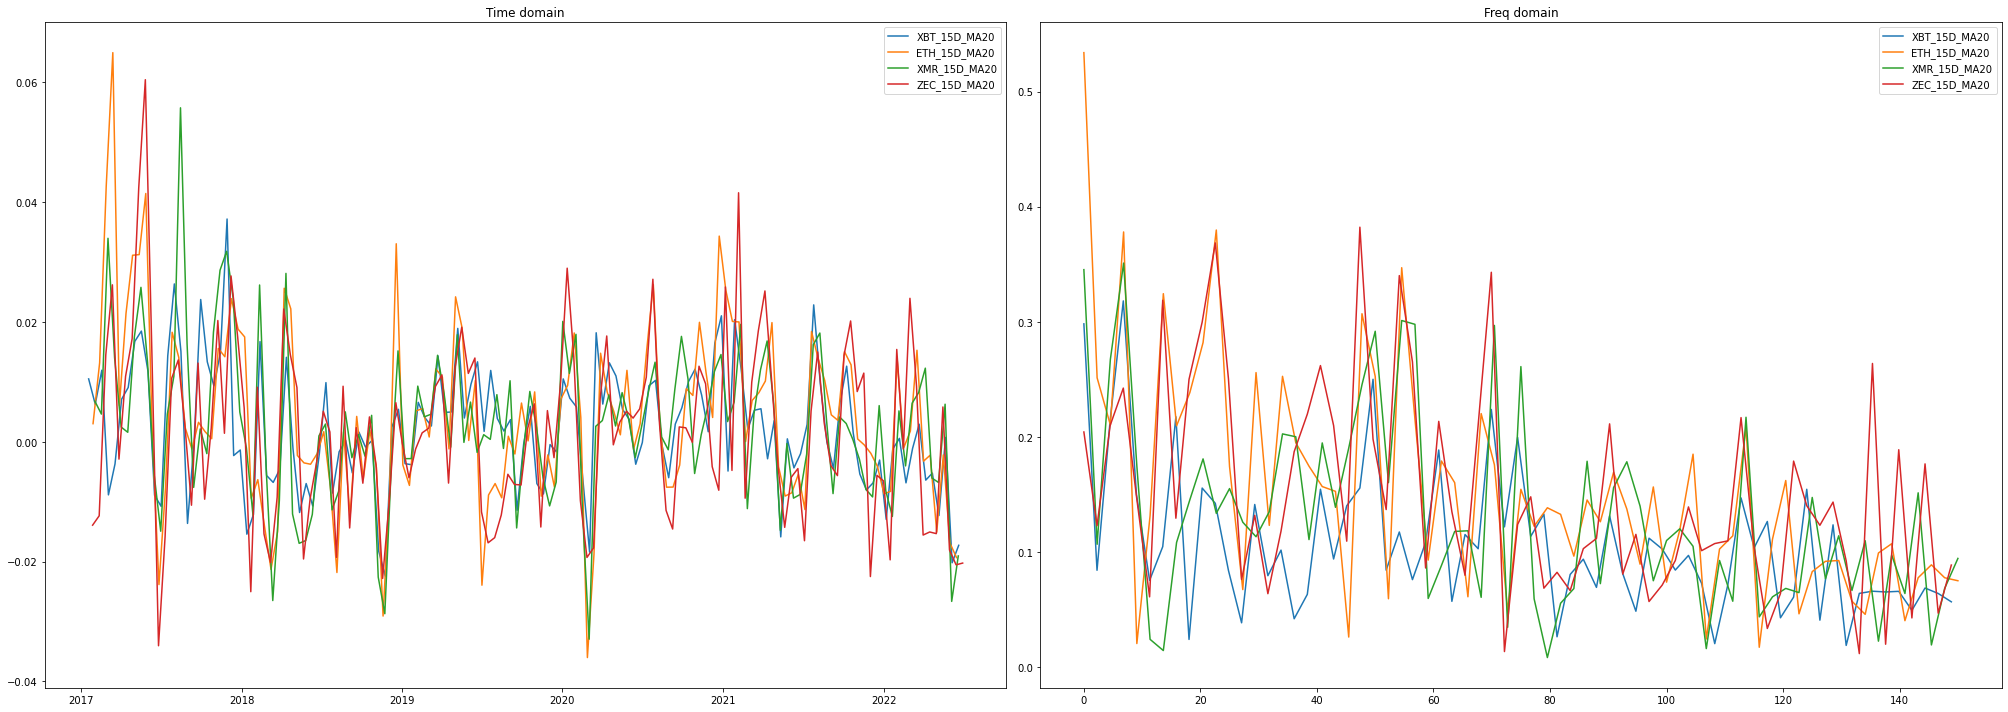

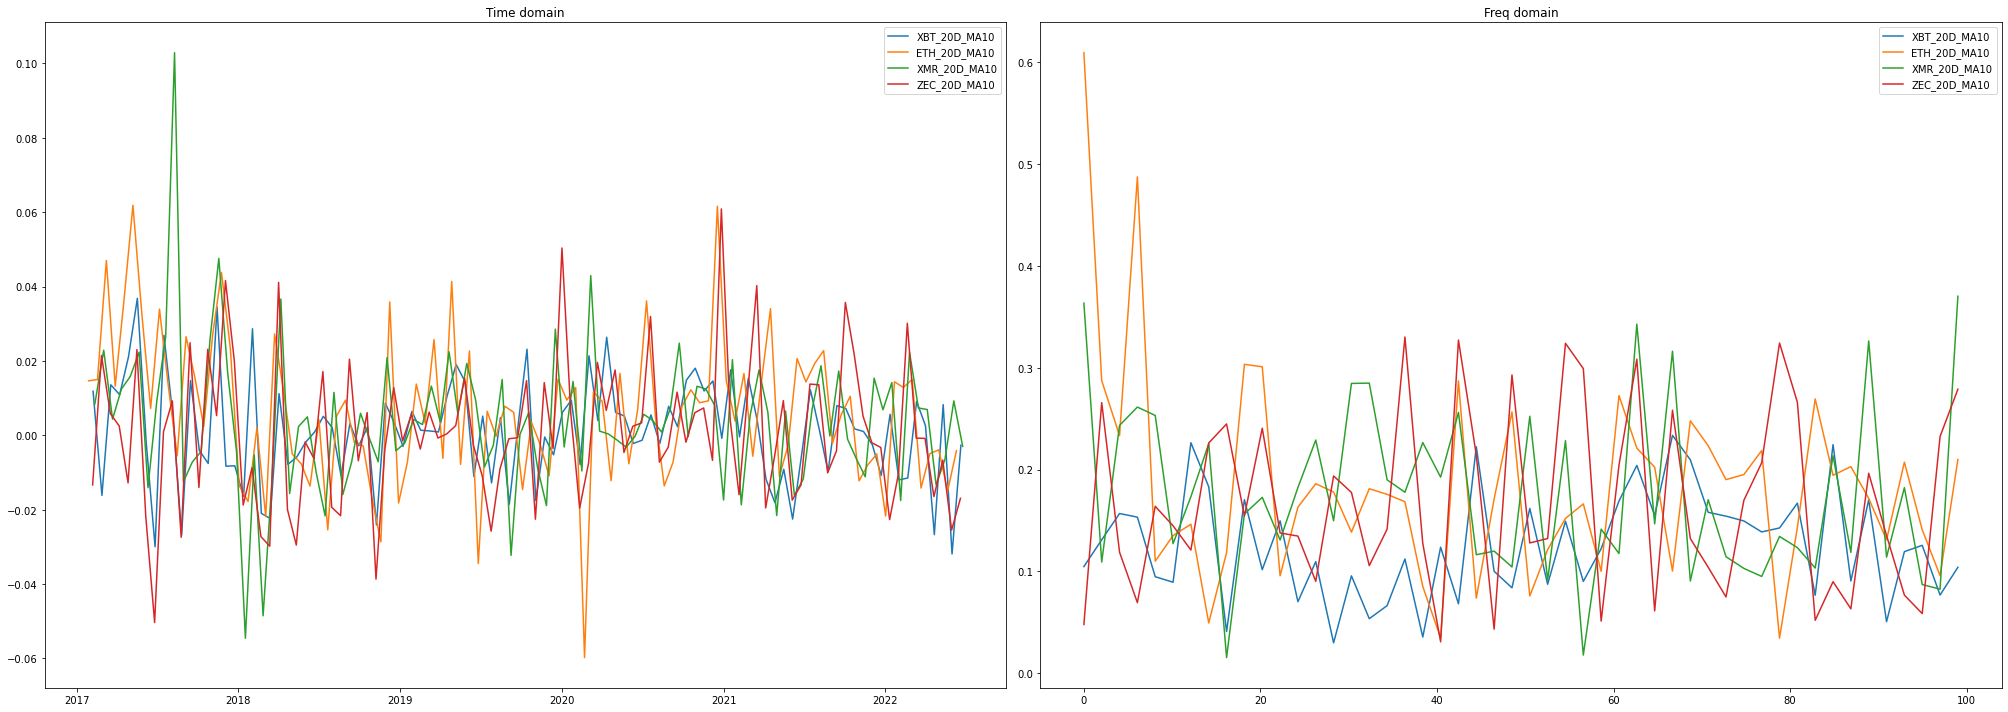

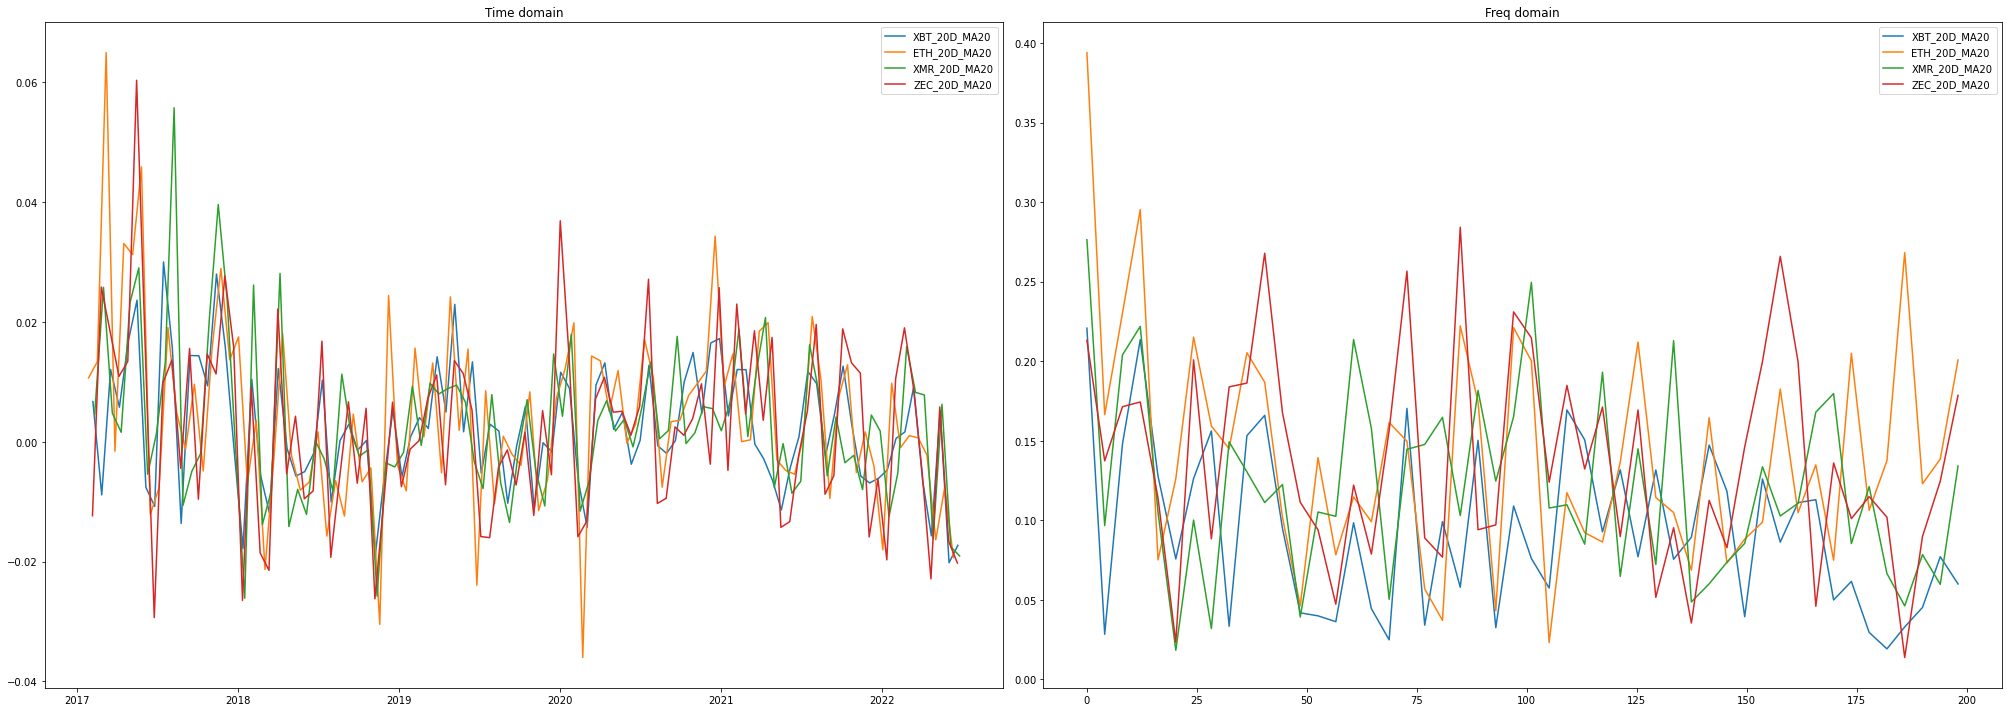

In [6]:
cryptos = ['XBT', 'ETH', 'XMR', 'ZEC']
for resample in ['10D', '15D', '20D']:
    for x in ['MA10', 'MA20']: #'MA5',
        dfs = build_dfs(resample, cryptos)
        plot(dfs, resample, x)